In [1]:
file_list = ['D','Hi-C','SLICE','SPRITE']

In [2]:
import pandas as pd
%matplotlib inline

import venn

insulator-insulator
D
Hi-C
SLICE
SPRITE
insulator-promoter
D
insulator-enhancer
D
Hi-C
SLICE
SPRITE
promoter-insulator
D


E:\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Hi-C
SLICE
SPRITE
promoter-promoter
D
Hi-C
SLICE
SPRITE
promoter-enhancer
D
Hi-C
SLICE
SPRITE
enhancer-insulator
D
enhancer-promoter
D
enhancer-enhancer
D
Hi-C
SLICE
SPRITE


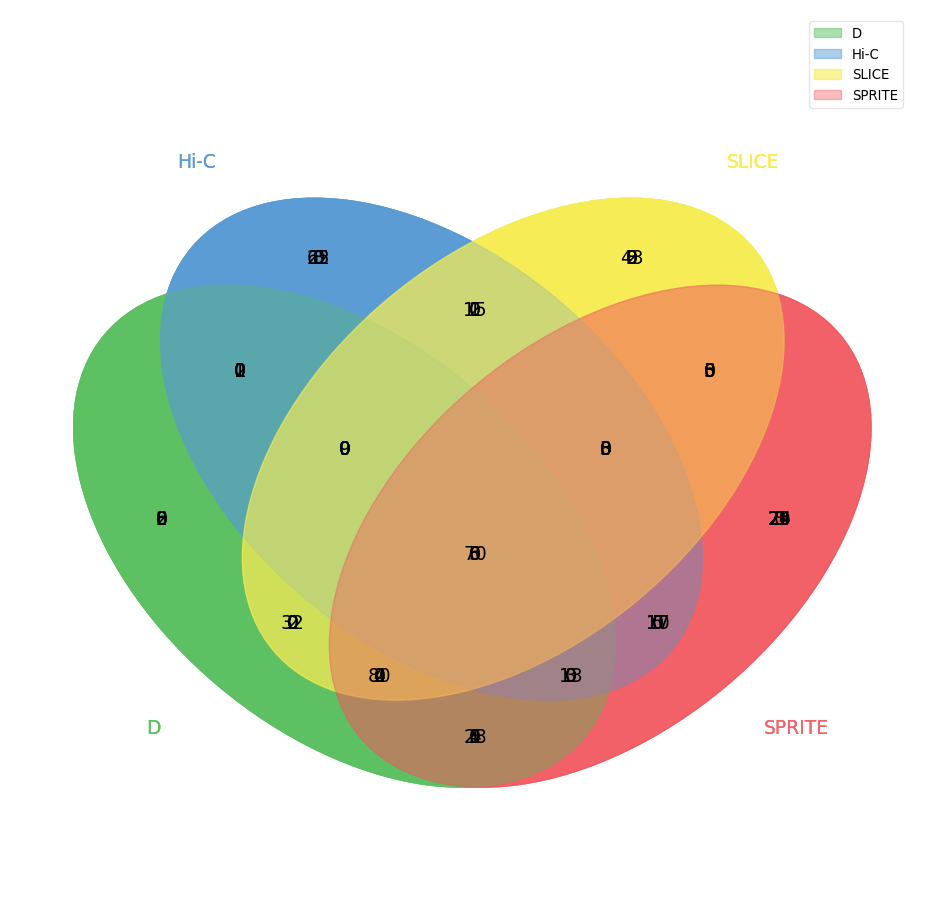

In [11]:
import matplotlib.pyplot as plt
file_list = ['D','Hi-C','SLICE','SPRITE']
state_list = ['insulator','promoter','enhancer']
for s1 in state_list:
    for s2 in state_list:
        pair = s1+"-"+s2
        print (pair)
        try:
            enriched_motif_list = []
            for x in file_list:
                print (x)
                file = x+"/9_6_2018."+pair+".enriched.MP.csv"
                df = pd.read_csv(file)
                df = df[(df.Ratio >= 1.5) & (df.ForeCov >= 0.3) & (df.DiffCov >= 0.1)]
                motif_list1 = df.Row.apply(lambda x:x.split("_")[0].replace("mm9.","")) + "-" +  df.Column.apply(lambda x:x.split("_")[0].replace("mm9.",""))
#                 print (motif_list1.tolist())
#                 result = list(set(motif_list1).intersection(motif_list2))
                enriched_motif_list.append(motif_list1)
            
            labels = venn.get_labels(enriched_motif_list, fill=['number'])
            label_list = list(map(lambda x:x.replace("D_norm","D'"),file_list)) 
            fig, ax = venn.venn4(labels, names=label_list)
#             fig.close()
            print (set(enriched_motif_list[0]).intersection(*enriched_motif_list))
        except:
            continue